In [129]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [130]:
df_baseline = pd.read_csv("df_clean.csv")
print(f"Shape: {df_baseline.shape}")

Shape: (2850, 14)


In [131]:
y_baseline = df_baseline[["Subscription  Length", "Churn"]]

print("Baseline Target Structure: ")
print(y_baseline.head())

Baseline Target Structure: 
   Subscription  Length  Churn
0                    38      0
1                    39      0
2                    37      0
3                    38      0
4                    38      0


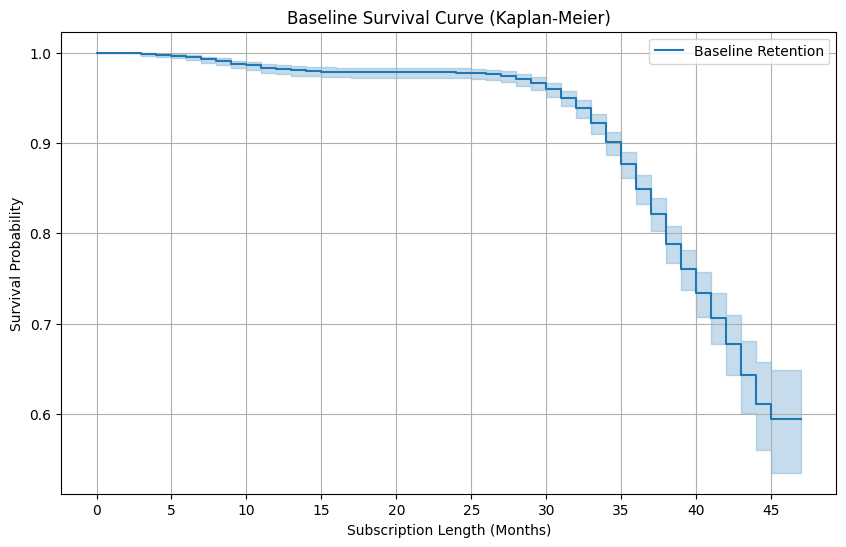

In [132]:
kmf = KaplanMeierFitter()

kmf.fit(durations=df_baseline['Subscription  Length'], event_observed=df_baseline['Churn'], label='Baseline Retention')

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Baseline Survival Curve (Kaplan-Meier)')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Survival Probability')
plt.xticks(np.arange(0, df_baseline["Subscription  Length"].max()+1, 5))
plt.grid(True)
plt.show()

In [133]:
df_baseline["Minutes of Use"] = df_baseline["Seconds of Use"] / 60
df_baseline["Charge Amount/10"] = df_baseline["Charge  Amount"] / 10
df_baseline = df_baseline.drop(columns=["Seconds of Use", "Charge  Amount"])
features = [
    "Call  Failure",
    "Complains",
    "Charge Amount/10",
    "Minutes of Use",
    "Frequency of SMS",
    "Distinct Called Numbers",
    "Age",
    "Tariff Plan"
]

target_baseline = ["Subscription  Length", "Churn"]
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_baseline[features + target_baseline], duration_col="Subscription  Length", event_col="Churn")


<lifelines.CoxPHFitter: fitted with 2850 total observations, 2404 right-censored observations>

                             coef  exp(coef)             p
covariate                                                 
Call  Failure            0.014239   1.014340  5.296701e-02
Complains                1.851164   6.367229  7.656715e-67
Charge Amount/10        -1.639419   0.194093  1.114284e-02
Minutes of Use          -0.009339   0.990705  5.919181e-09
Frequency of SMS        -0.006138   0.993880  5.128499e-10
Distinct Called Numbers -0.038950   0.961798  1.777698e-12
Age                     -0.017111   0.983034  5.916247e-03
Tariff Plan              0.435396   1.545574  2.601858e-01


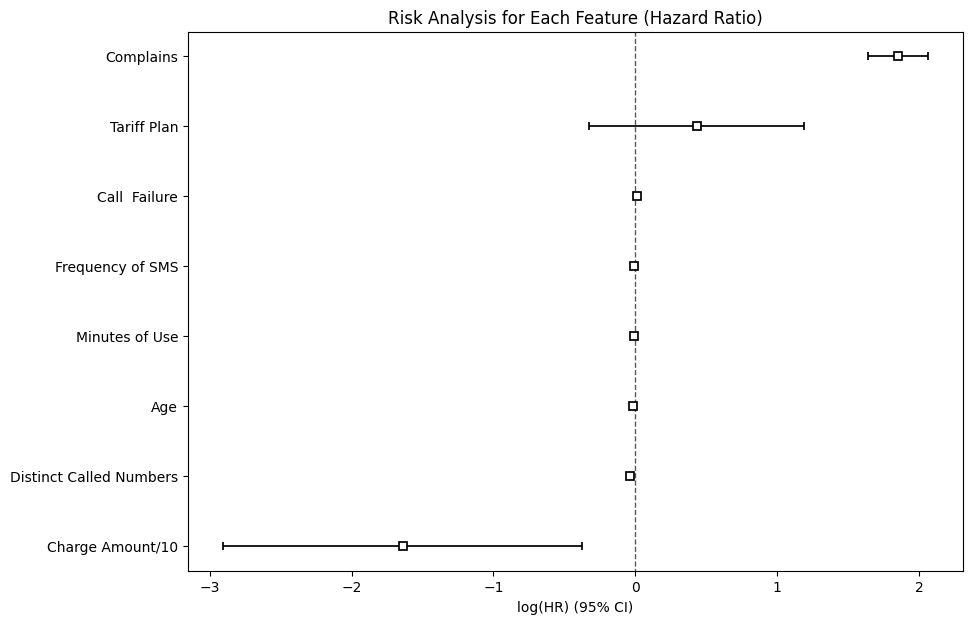

In [134]:
summary = cph.summary[["coef", "exp(coef)", "p"]]
print(summary)

plt.figure(figsize=(10, 7))
cph.plot()
plt.title("Risk Analysis for Each Feature (Hazard Ratio)")
plt.show()

In [135]:
print(f"Baseline C-index: {cph.concordance_index_}")

Baseline C-index: 0.8742529253715617
